# IMPORTING ALL NECESSARY LIBRARIES AND FUNCTIONS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from google.colab import files
from glob import glob
import random
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

from keras import optimizers
from google.colab import files

# CHECKING IF THE GPU IS WORKING 

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# IMPORTING THE DATASET FROM GOOGLE DRIVE 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

train_path='/content/drive/MyDrive/image classification/train_dataset'
test_path='/content/drive/MyDrive/image classification/test_dataset'

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2, zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

training_set_320=train_datagen.flow_from_directory(train_path,target_size=(320,320),batch_size=32,class_mode='categorical')
testing_set_320=test_datagen.flow_from_directory(test_path,target_size=(320,320),batch_size=32,class_mode='categorical')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Found 4593 images belonging to 2 classes.
Found 2166 images belonging to 2 classes.
Found 4593 images belonging to 2 classes.
Found 2166 images belonging to 2 classes.


# GoogleNet MODEL
### MAKING, COMPILATION, STRUCTURE, FITTING, PROGRESS VISUALIZATION AND HEATMAP

87924736/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


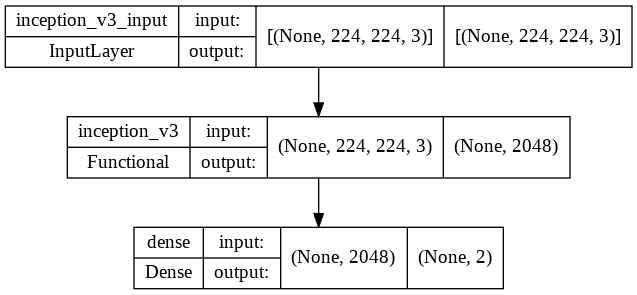

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

model3=Sequential()

# adding the pretrained InceptionNet model
model3.add(InceptionV3(include_top=False,weights='imagenet',pooling='max',input_shape=(224,224,3)))

# adding the output layer 
model3.add(Dense(2,activation='softmax'))

# compiling the model
model3.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# printing the blueprint of the model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
# fitting the alexnet model
r3=model3.fit_generator(training_set,validation_data=testing_set,epochs=10,steps_per_epoch=(len(training_set)),validation_steps=(len(testing_set)))

# keys present in the history
print(r3.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
144/144 [==============================] - 1166s 8s/step - loss: 0.2300 - accuracy: 0.9255 - val_loss: 0.1742 - val_accuracy: 0.9538
Epoch 2/10
144/144 [==============================] - 196s 1s/step - loss: 0.1074 - accuracy: 0.9602 - val_loss: 0.0797 - val_accuracy: 0.9728
Epoch 3/10
144/144 [==============================] - 190s 1s/step - loss: 0.0722 - accuracy: 0.9765 - val_loss: 0.1851 - val_accuracy: 0.9381
Epoch 4/10
144/144 [==============================] - 188s 1s/step - loss: 0.0495 - accuracy: 0.9813 - val_loss: 0.0672 - val_accuracy: 0.9783
Epoch 5/10
144/144 [==============================] - 187s 1s/step - loss: 0.0398 - accuracy: 0.9861 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 6/10
144/144 [==============================] - 187s 1s/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0316 - val_accuracy: 0.9889
Epoch 7/10
144/144 [==============================] - 185s 1s/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0250 - val_accuracy: 0.991

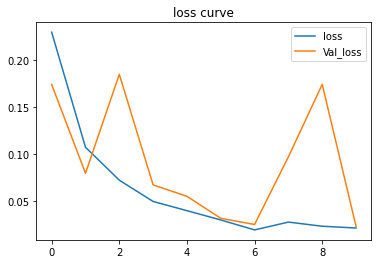

Text(0.5, 1.0, 'Accuracy Evolution')

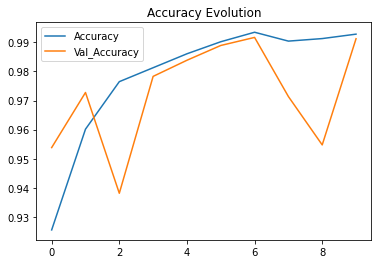

In [9]:
import matplotlib.pyplot as plt

plt.plot(r3.history['loss'],label='loss')
plt.plot(r3.history['val_loss'],label='Val_loss')
plt.title('loss curve')
plt.legend()
plt.show()

plt.plot(r3.history['accuracy'], label='Accuracy')
plt.plot(r3.history['val_accuracy'], label='Val_Accuracy')
plt.title('accuracy curve')
plt.legend()
plt.title('Accuracy Evolution')

In [10]:
evaluation=model3.evaluate(testing_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation=model3.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

68/68 [==============================] - 57s 832ms/step - loss: 0.0231 - accuracy: 0.9912
Test Accuracy: 99.12%
144/144 [==============================] - 124s 863ms/step - loss: 0.0192 - accuracy: 0.9926
Train Accuracy: 99.26%
